In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file_path = '/content/drive/MyDrive/MapIT.ai internship Dec 2023/Datasets/all_rev_centers_daily_sales.csv'

In [4]:
data = pd.read_csv(file_path)
data['Date'] = pd.to_datetime(data['Date'])
data.sort_values('Date', inplace=True)
data

,Date,Net_Sales
0,2022-01-01,505548.25
1,2022-01-02,521347.82
2,2022-01-03,398828.19
3,2022-01-04,332919.47
4,2022-01-05,322661.20
...,...,...
624,2023-09-17,574720.37
625,2023-09-18,341120.15
626,2023-09-19,338170.42
627,2023-09-20,370340.61


In [5]:
def create_lagged_features(df, n_lags=5):
    for lag in range(1, n_lags + 1):
        df[f'lag_{lag}'] = df['Net_Sales'].shift(lag)
    df.dropna(inplace=True)
    return df

In [6]:
# increasing the #lags increases the model performance
n_lags = 10
# n_lags = 5
data_with_lags = create_lagged_features(data, n_lags)
data_with_lags

,Date,Net_Sales,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10
10,2022-01-11,293236.79,286363.32,415667.81,502955.83,472878.87,335006.62,322661.20,332919.47,398828.19,521347.82,505548.25
11,2022-01-12,298280.68,293236.79,286363.32,415667.81,502955.83,472878.87,335006.62,322661.20,332919.47,398828.19,521347.82
12,2022-01-13,301875.00,298280.68,293236.79,286363.32,415667.81,502955.83,472878.87,335006.62,322661.20,332919.47,398828.19
13,2022-01-14,432100.67,301875.00,298280.68,293236.79,286363.32,415667.81,502955.83,472878.87,335006.62,322661.20,332919.47
14,2022-01-15,520456.72,432100.67,301875.00,298280.68,293236.79,286363.32,415667.81,502955.83,472878.87,335006.62,322661.20
...,...,...,...,...,...,...,...,...,...,...,...,...
624,2023-09-17,574720.37,638701.63,566433.87,379170.75,351776.10,317056.01,328956.76,517350.00,580272.60,494271.01,337550.25
625,2023-09-18,341120.15,574720.37,638701.63,566433.87,379170.75,351776.10,317056.01,328956.76,517350.00,580272.60,494271.01
626,2023-09-19,338170.42,341120.15,574720.37,638701.63,566433.87,379170.75,351776.10,317056.01,328956.76,517350.00,580272.60
627,2023-09-20,370340.61,338170.42,341120.15,574720.37,638701.63,566433.87,379170.75,351776.10,317056.01,328956.76,517350.00


In [7]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data_with_lags.drop(columns=['Date']))

In [8]:
print(scaled_data[:, 0].shape, scaled_data.shape, type(scaled_data))
scaled_data

(619,) (619, 11) <class 'numpy.ndarray'>


array([[0.38803997, 0.37866595, 0.55501099, ..., 0.53204517, 0.69913704,
        0.67758964],
       [0.39491881, 0.38803997, 0.37866595, ..., 0.44215908, 0.53204517,
        0.69913704],
       [0.39982073, 0.39491881, 0.38803997, ..., 0.42816888, 0.44215908,
        0.53204517],
       ...,
       [0.44932031, 0.45334314, 0.77192635, ..., 0.43675475, 0.69368482,
        0.77949846],
       [0.4931939 , 0.44932031, 0.45334314, ..., 0.42052454, 0.43675475,
        0.69368482],
       [0.51329878, 0.4931939 , 0.44932031, ..., 0.46787569, 0.42052454,
        0.43675475]])

In [9]:
X = scaled_data[:, 1:]
y = scaled_data[:, 0]
X = X.reshape((X.shape[0], 1, X.shape[1]))

# train-test split = 0.25
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=False)

In [10]:
print(X_test.shape, X_test, X_test[0, 0])
trial = X_test[0, 0].tolist()
print(trial)
print(y_test[0])

(155, 1, 10) [[[0.47923356 0.46374405 0.48067927 ... 0.48112283 0.4561315  0.51765537]]

 [[0.52868167 0.47923356 0.46374405 ... 0.56764024 0.48112283 0.4561315 ]]

 [[0.69816985 0.52868167 0.47923356 ... 0.77915399 0.56764024 0.48112283]]

 ...

 [[0.45334314 0.77192635 0.85918378 ... 0.43675475 0.69368482 0.77949846]]

 [[0.44932031 0.45334314 0.77192635 ... 0.42052454 0.43675475 0.69368482]]

 [[0.4931939  0.44932031 0.45334314 ... 0.46787569 0.42052454 0.43675475]]] [0.47923356 0.46374405 0.48067927 0.74060375 0.84755089 0.77915399
 0.56764024 0.48112283 0.4561315  0.51765537]
[0.47923356316762616, 0.46374405125518936, 0.48067926949375533, 0.7406037544341122, 0.8475508911647684, 0.7791539910855702, 0.5676402383960266, 0.48112283073133655, 0.4561315017507331, 0.5176553710841714]
0.528681667375659


In [11]:
print(type(X), X.shape)

X1 = X
np.save('last_known_data.npy', X1)


<class 'numpy.ndarray'> (619, 1, 10)


In [12]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
# extra LSTM + Dropout layer added
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [30]:
print(X_train.shape, y_train.shape)

(464, 1, 10) (464,)


In [13]:
model.compile(optimizer='adam', loss='mean_squared_error')

# Increased r2 score with increased #epochs
model.fit(X_train, y_train, epochs=1500, batch_size=32)
n_total_features = X.shape[2] + 1


Epoch 1/1500
15/15 [==============================] - 5s 4ms/step - loss: 0.3103
Epoch 2/1500
15/15 [==============================] - 0s 3ms/step - loss: 0.2110
Epoch 3/1500
15/15 [==============================] - 0s 4ms/step - loss: 0.0597
Epoch 4/1500
15/15 [==============================] - 0s 3ms/step - loss: 0.0296
Epoch 5/1500
15/15 [==============================] - 0s 4ms/step - loss: 0.0254
Epoch 6/1500
15/15 [==============================] - 0s 3ms/step - loss: 0.0261
Epoch 7/1500
15/15 [==============================] - 0s 4ms/step - loss: 0.0250
Epoch 8/1500
15/15 [==============================] - 0s 5ms/step - loss: 0.0237
Epoch 9/1500
15/15 [==============================] - 0s 4ms/step - loss: 0.0238
Epoch 10/1500
15/15 [==============================] - 0s 4ms/step - loss: 0.0221
Epoch 11/1500
15/15 [==============================] - 0s 5ms/step - loss: 0.0187
Epoch 12/1500
15/15 [==============================] - 0s 4ms/step - loss: 0.0189
Epoch 13/1500
15/15 [====

In [14]:
y_pred = model.predict(X_test)

5/5 [==============================] - 1s 2ms/step


In [15]:

# new_input = np.array([[0.47923356, 0.46374405, 0.48067927, 0.74060375, 0.84755089, 0.77915399, 0.56764024, 0.48112283, 0.4561315, 0.51765537, 0.47923356, 0.77915399]])
# scaled_input = scaler.transform(new_input[:, 1:])
# # scaled_input_reshaped = scaled_input.reshape((scaled_input.shape[0], 1, scaled_input.shape[1]))
# predicted_value = model.predict(scaled_input)
# predicted_value_original_scale = scaler.inverse_transform(np.hstack((predicted_value, new_input[:, 1:])))
# print("Predicted value:", predicted_value_original_scale[0, 0])


In [16]:
dummy_features = np.zeros((y_pred.shape[0], n_total_features - 1))
y_pred_full = np.concatenate((y_pred, dummy_features), axis=1)

y_pred_inv = scaler.inverse_transform(y_pred_full)[:, 0]

y_test_full = np.concatenate((y_test.reshape(-1, 1), dummy_features), axis=1)
y_test_inv = scaler.inverse_transform(y_test_full)[:, 0]


In [17]:
# Mean Squared Error (MSE)
mse = mean_squared_error(y_test_inv, y_pred_inv)
print(f"Mean Squared Error (MSE): {mse}")

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test_inv, y_pred_inv)
print(f"Mean Absolute Error (MAE): {mae}")

# R-squared (Coefficient of Determination)
r2 = r2_score(y_test_inv, y_pred_inv)
print(f"R-squared (Coefficient of Determination): {r2}")

r2 = r2_score(y_test_inv, y_pred_inv)
r2_percentage = r2 * 100
print(f"The R^2 score as a percentage: {r2_percentage}%")


Mean Squared Error (MSE): 991072554.4554658
Root Mean Squared Error (RMSE): 31481.304840420224
Mean Absolute Error (MAE): 22199.505984187963
R-squared (Coefficient of Determination): 0.8888112734012226
The R^2 score as a percentage: 88.88112734012226%


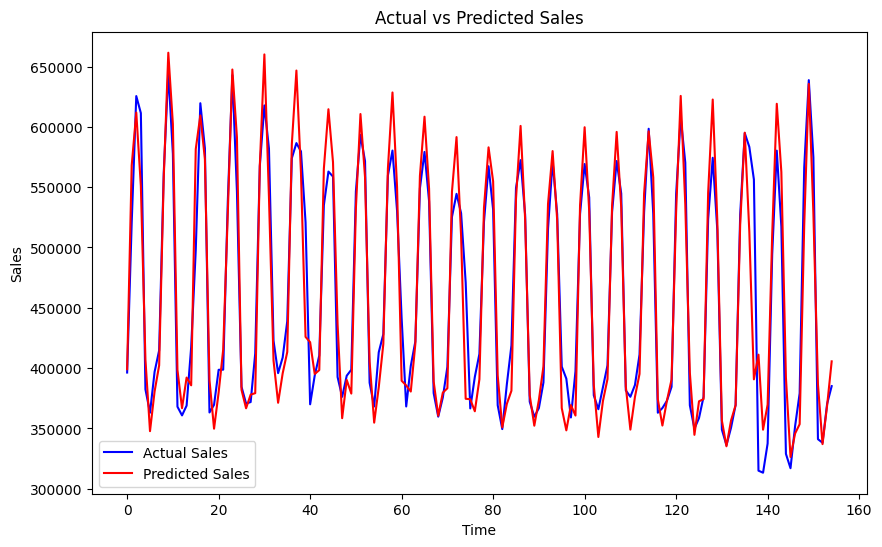

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(y_test_inv, label='Actual Sales', color='blue')
plt.plot(y_pred_inv, label='Predicted Sales', color='red')
plt.title('Actual vs Predicted Sales')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.legend()
plt.show()

Mean Squared Error: 991072554.4554658


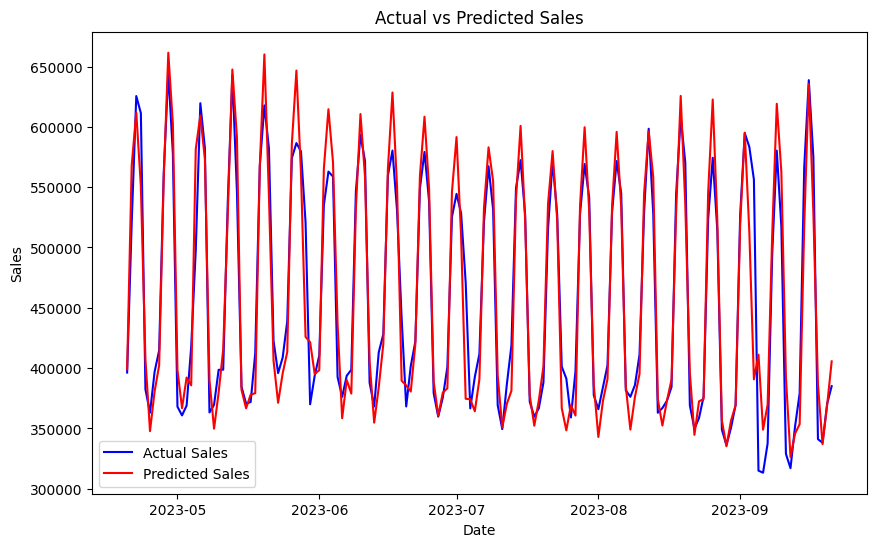

In [19]:
mse = mean_squared_error(y_test_inv, y_pred_inv)
print(f"Mean Squared Error: {mse}")

plt.figure(figsize=(10, 6))
plt.plot(data['Date'][-len(y_test):], y_test_inv, label='Actual Sales', color='blue')
plt.plot(data['Date'][-len(y_test):], y_pred_inv, label='Predicted Sales', color='red')
plt.title('Actual vs Predicted Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()


In [20]:
print(y_pred_full.shape, y_pred_inv.shape)
print(y_pred_full)
print(y_pred_inv)

(155, 11) (155,)
[[0.53247929 0.         0.         ... 0.         0.         0.        ]
 [0.76283777 0.         0.         ... 0.         0.         0.        ]
 [0.82252228 0.         0.         ... 0.         0.         0.        ]
 ...
 [0.44775328 0.         0.         ... 0.         0.         0.        ]
 [0.49127614 0.         0.         ... 0.         0.         0.        ]
 [0.5413214  0.         0.         ... 0.         0.         0.        ]]
[399146.50306129 568056.19612067 611819.69485257 550995.40692272
 407183.53451146 347760.99493364 380578.59291514 402345.00495995
 557463.25641823 661430.17078587 602283.36563742 398543.3312655
 366833.69706888 392199.47266809 385760.03137976 581504.55398892
 609450.75630846 573165.56514893 390107.31747176 349814.1216238
 379805.36522069 415462.82241145 527986.41989594 647519.6332393
 591401.62373031 382046.3357177  366736.759525   378052.40401806
 379254.98898531 567642.79114883 660026.84905621 541705.79206067
 406269.22728966 37131

In [21]:
# Trial prediction
temp1 = []
temp1.append(trial)
temp2 = []
temp2.append(temp1)
print(temp2)
prediction = model.predict(temp2)[0, 0]
print(prediction)
temp3 = []
temp3.append(prediction)
for i in range(10):
  temp3.append(0)
temp3 = np.array(temp3)
temp3 = temp3.reshape(1, -1)
print(temp3.shape)
inv_scaled_prediction = scaler.inverse_transform(temp3)[0, 0]
print(inv_scaled_prediction)

[[[0.47923356316762616, 0.46374405125518936, 0.48067926949375533, 0.7406037544341122, 0.8475508911647684, 0.7791539910855702, 0.5676402383960266, 0.48112283073133655, 0.4561315017507331, 0.5176553710841714]]]
1/1 [==============================] - 0s 24ms/step
0.5324793
(1, 11)
399146.5030612946


In [22]:
import pickle
pickle_out = open("model.pkl","wb")
pickle.dump(model, pickle_out)
pickle_out.close()

In [23]:
print(X_test)
print(X_test[0, 0])


[[[0.47923356 0.46374405 0.48067927 ... 0.48112283 0.4561315  0.51765537]]

 [[0.52868167 0.47923356 0.46374405 ... 0.56764024 0.48112283 0.4561315 ]]

 [[0.69816985 0.52868167 0.47923356 ... 0.77915399 0.56764024 0.48112283]]

 ...

 [[0.45334314 0.77192635 0.85918378 ... 0.43675475 0.69368482 0.77949846]]

 [[0.44932031 0.45334314 0.77192635 ... 0.42052454 0.43675475 0.69368482]]

 [[0.4931939  0.44932031 0.45334314 ... 0.46787569 0.42052454 0.43675475]]]
[0.47923356 0.46374405 0.48067927 0.74060375 0.84755089 0.77915399
 0.56764024 0.48112283 0.4561315  0.51765537]


In [24]:
# -----------(1)----------------------------------
# model.predict([[2022-01-14]])
# error due to scaling of date attribute entities
# model.predict([[0.47923356]])

# -----------(2)----------------------------------
# input_date = np.array(0.47923356)
# input_date = np.reshape(input_date, (1, 1, 1))
# model.predict(np.reshape(input_date, (input_date.shape[0], 1, input_date.shape[1])))

# -----------(3)----------------------------------
# last_known_data = X[-1]
# print(last_known_data)
# n_features = X.shape[2]
# current_data = last_known_data.reshape(1, -1, n_features)
# future_sales_predictions = model.predict(current_data)[0, 0]
# print(future_sales_predictions)

# -----------(4)----------------------------------
def predict_future_sales(model, last_known_data, n_steps, n_features):
    future_predictions = []
    current_data = last_known_data.reshape(1, -1, n_features)  # Ensure the shape is [1, time steps, features]

    for _ in range(n_steps):
        # Predict the next step
        next_step_pred = model.predict(current_data)[0, 0]
        # Append prediction
        future_predictions.append(next_step_pred)
        # Update current data to include the new prediction
        current_data = np.roll(current_data, -1, axis=1)
        current_data[0, -1] = next_step_pred  # Update only the last time step with the new prediction

    return future_predictions

# Prepare the last known data (last 5 data points)
last_known_data = X[-1]  # Adjust as necessary to get the last known data points
n_features = X.shape[2]  # Number of features in your dataset


# Predict for future steps (e.g., for 2 years, adjust steps as needed)
n_steps = 365*2  # Assuming 365 days per year
future_sales_predictions = predict_future_sales(model, last_known_data, n_steps, n_features)
print(future_sales_predictions)


1/1 [==============================] - 0s 14ms/step
[0.5413214, 0.48631468, 0.44293326, 0.42043793, 0.41275147, 0.41070926, 0.41021454, 0.41009766, 0.41007024, 0.41006383, 0.41006228, 0.41006196, 0.41006187, 0.41006187, 0.41006187, 0.41006187, 0.41006187, 0.41006187, 0.41006187, 0.41006187, 0.41006187, 0.41006187, 0.41006187, 0.41006187, 0.41006187, 0.41006187, 0.41006187, 0.41006187, 0.41006187, 0.41006187, 0.41006187, 0.41006187, 0.41006187, 0.41006187, 0.41006187, 0.41006187, 0.41006187, 0.41006187, 0.41006187, 0.41006187, 0.41006187, 0.41006187, 0.41006187, 0.41006187, 0.41006187, 0.41006187, 0.41006187, 0.41006187, 0.41006187, 0.41006187, 0.41006187, 0.41006187, 0.41006187, 0.41006187, 0.41006187, 0.41006187, 0.41006187, 0.41006187, 0.41006187, 0.41006187, 0.41006187, 0.41006187, 0.41006187, 0.41006187, 0.41006187, 0.41006187, 0.41006187, 0.41006187, 0.41006187, 0.41006187, 0.41006187, 0.41006187, 0.41006187, 0.41006187, 0.41006187, 0.41006187, 0.41006187, 0.41006187, 0.41006187, 

In [25]:
print(len(future_sales_predictions))

730


In [26]:
prediction = model.predict([[[286363.32, 415667.81, 502955.83, 472878.87, 335006.62, 322661.2, 332919.47, 398828.19, 521347.82, 505548.25]]])[0, 0]
print(prediction)
lst = []
lst.append(prediction)
for i in range(10):
  lst.append(0)
lst = np.array(lst)
prediction = lst
prediction = np.array(prediction)
prediction = prediction.reshape(1, -1)
print(prediction.shape)
transformed_prediction = scaler.inverse_transform(prediction)
print(transformed_prediction[0, 0])


1/1 [==============================] - 0s 26ms/step
0.80298936
(1, 11)
597497.2383019162


In [27]:
# def predict_future_sales(model, last_known_data, n_steps, n_features):
#     future_predictions = []
#     current_data = last_known_data.reshape(1, -1, n_features)  # Ensure the shape is [1, time steps, features]

#     for _ in range(n_steps):
#         # Predict the next step
#         next_step_pred = model.predict(current_data)[0, 0]
#         # Append prediction
#         future_predictions.append(next_step_pred)
#         # Update current data to include the new prediction
#         current_data = np.roll(current_data, -1, axis=1)
#         current_data[0, -1] = next_step_pred  # Update only the last time step with the new prediction

#     return future_predictions

# # Prepare the last known data (last 5 data points)
# last_known_data = X[-1]  # Adjust as necessary to get the last known data points
# n_features = X.shape[2]  # Number of features in your dataset

# # Predict for future steps (e.g., for 2 years, adjust steps as needed)
# n_steps = 365 * 2  # Assuming 365 days per year
# future_sales_predictions = predict_future_sales(model, last_known_data, n_steps, n_features)


In [28]:
# web: gunicorn -w 4 -k uvicorn.workers.UvicornWorker app:app

In [29]:
from keras.models import load_model

# Assuming `model` is your Keras model
model.save('my_keras_model.h5')  # Save the model using Keras's native serialization


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [31]:
# Save the scaler to a file using pickle
with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)
